#Genetic Algorithm



Algorithm:

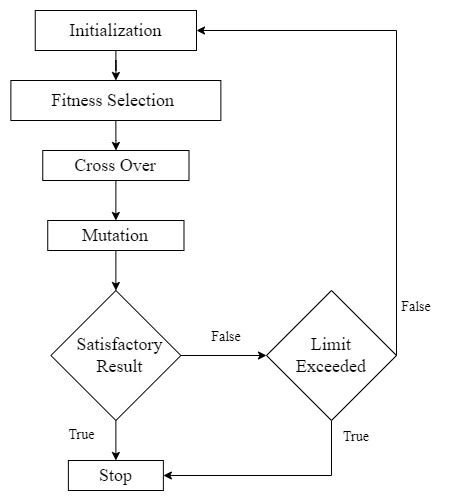

Algorithm:


x=0


In [44]:
from random import choices, randint, randrange, random
from typing import List, Optional, Callable, Tuple
from collections import namedtuple
from functools import partial
import time

In [45]:
Team = List[int]
Team_combinations = List[Team]
PopulateFunc = Callable[[], Team_combinations]
FitnessFunc = Callable[[Team], int]
SelectionFunc = Callable[[Team_combinations, FitnessFunc], Tuple[Team, Team]]
CrossoverFunc = Callable[[Team, Team], Tuple[Team, Team]]
MutationFunc = Callable[[Team], Team]
PrinterFunc = Callable[[Team_combinations, int, FitnessFunc], None]
Thing = namedtuple('Thing', ['name', 'value', 'weight'])
things = [
 Thing('Lebron James', 10, 50),
    Thing('Steph Curry  ', 9, 40),
    Thing('Kevin Durant', 7, 35),
    Thing('Anthony Davis', 8, 15),
    Thing('Zach LaVine', 5, 10),
    Thing('Kobe Bryant', 10, 70)

]

In [46]:
def generate_Team(length: int) -> Team:
    return choices([0, 1], k=length)

In [47]:
def generate_team_combos(size: int, genome_length: int) -> Team_combinations:
    return [generate_Team(genome_length) for _ in range(size)]

In [48]:
def single_point_crossover(a: Team, b: Team) -> Tuple[Team, Team]:
    if len(a) != len(b):
        raise ValueError("Team a and b must be of same length")

    length = len(a)
    if length < 2:
        return a, b
    p = randint(1, length - 1)
    return a[0:p] + b[p:], b[0:p] + a[p:]

In [49]:
def mutation(team: Team, num: int = 1, probability: float = 0.5) -> Team:
    print("before :",team)
    for _ in range(num):
        index = randrange(len(team))
        
        team[index] = team[index] if random() > probability else abs(team[index] - 1)
    print("After :",team)
    return team

In [50]:
def fitness(Team: Team, things: [Thing], weight_limit: int) -> int:
    if len(Team) != len(things):
        raise ValueError("genome and things must be of same length")

    weight = 0
    value = 0

    
    for i, thing in enumerate(things):
        if Team[i] == 1:
            weight += thing.weight
            value += thing.value


            if weight > weight_limit:
                return 0
    return value

In [51]:
def selection_pair(population: Team_combinations, fitness_func: FitnessFunc) -> Team_combinations:
    return choices(
        population=population,
        weights=[fitness_func(gene) for gene in population],
        k=2
    )

In [52]:
def sort_population(population: Team_combinations, fitness_func: FitnessFunc) -> Team_combinations:
    return sorted(population, key=fitness_func, reverse=True)

In [53]:
def team_to_string(team: Team) -> str:
    return "".join(map(str, team))

In [54]:
def run_evolution(
        populate_func: PopulateFunc,
        fitness_func: FitnessFunc,
        fitness_limit: int,
        selection_func: SelectionFunc = selection_pair,
        crossover_func: CrossoverFunc = single_point_crossover,
        mutation_func: MutationFunc = mutation,
        generation_limit: int = 100,
        printer: Optional[PrinterFunc] = None) \
        -> Tuple[Team_combinations, int]:
    population = populate_func()

    for i in range(generation_limit):
        population = sorted(population, key=lambda genome: fitness_func(genome), reverse=True)

        if printer is not None:
            printer(population, i, fitness_func)
            
        if fitness_func(population[0]) >= fitness_limit:
            break

        next_generation = population[0:2]

        for j in range(int(len(population) / 2) - 1):
            parents = selection_func(population, fitness_func)
            offspring_a, offspring_b = crossover_func(parents[0], parents[1])
            offspring_a = mutation_func(offspring_a)
            offspring_b = mutation_func(offspring_b)
            next_generation += [offspring_a, offspring_b]

        population = next_generation

    return population, i

In [55]:
def bruteforce(things, weight_limit: int):
    if len(things) == 0:
        return 0, []

    max_value = 0
    max_valued_packed = []
    for i, thing in enumerate(things):
        if thing.weight > weight_limit:
            continue

        value, packed = bruteforce(things[i + 1:], weight_limit - thing.weight)
        if value + thing.value >= max_value:
            max_value = value + thing.value
            max_valued_packed = [thing] + packed
    
    return max_value, max_valued_packed

In [56]:
weight_limit = 105
start = time.time()
bruteforce(things, weight_limit)
end = time.time()
print("brute force algorithm execution time : ",end-start)
max_value, max_valued_packed= bruteforce(things, weight_limit)
print("Maximum Rating for the team:",max_value)
print("the dream team by Brute force:",max_valued_packed)

brute force algorithm execution time :  0.00012683868408203125
Maximum Rating for the team: 29
the dream team by Brute force: [Thing(name='Steph Curry  ', value=9, weight=40), Thing(name='Kevin Durant', value=7, weight=35), Thing(name='Anthony Davis', value=8, weight=15), Thing(name='Zach LaVine', value=5, weight=10)]


In [57]:
start = time.time()
population, generations = run_evolution(
        populate_func=partial(generate_team_combos, size=10, genome_length=len(things)),
        fitness_func=partial(fitness, things=things, weight_limit=105),
        fitness_limit=29,
        generation_limit=200
    )
end = time.time()

print("Genetic algorithm execution time : ",end-start)

before : [1, 1, 0, 0, 1, 0]
After : [1, 1, 0, 0, 1, 0]
before : [0, 0, 0, 1, 0, 0]
After : [0, 0, 0, 1, 1, 0]
before : [0, 0, 1, 0, 0, 1]
After : [1, 0, 1, 0, 0, 1]
before : [0, 0, 0, 0, 0, 1]
After : [0, 1, 0, 0, 0, 1]
before : [0, 0, 0, 1, 0, 0]
After : [0, 0, 0, 1, 1, 0]
before : [1, 1, 0, 0, 0, 1]
After : [1, 1, 0, 0, 0, 1]
before : [0, 0, 0, 0, 1, 1]
After : [0, 0, 0, 0, 1, 1]
before : [0, 0, 1, 0, 0, 0]
After : [0, 0, 1, 0, 0, 0]
before : [0, 1, 0, 1, 0, 0]
After : [0, 1, 0, 1, 1, 0]
before : [1, 0, 0, 1, 1, 0]
After : [1, 0, 0, 1, 1, 0]
before : [0, 0, 1, 0, 0, 1]
After : [0, 0, 1, 0, 0, 1]
before : [0, 0, 0, 0, 1, 1]
After : [0, 1, 0, 0, 1, 1]
before : [0, 0, 0, 1, 1, 1]
After : [0, 0, 0, 1, 1, 1]
before : [0, 0, 1, 0, 0, 0]
After : [0, 0, 1, 0, 0, 0]
before : [1, 1, 0, 0, 0, 0]
After : [1, 0, 0, 0, 0, 0]
before : [0, 0, 1, 0, 1, 0]
After : [0, 0, 1, 0, 1, 1]
before : [1, 0, 0, 1, 0, 1]
After : [1, 0, 0, 1, 0, 1]
before : [0, 0, 1, 0, 1, 0]
After : [0, 0, 1, 1, 1, 0]
before : [

In [26]:
print(generations,team_to_string(population[0]))

9 011110


With lager values to select from, the brute force take exorbitant amount of time as sited by - Svogor, Ivan & Crnkovic, Ivica & Vrcek, Neven. (2013). Multi-criteria software component allocation on a heterogeneous platform. Proceedings of the International Conference on Information Technology Interfaces, ITI. 341-346. 10.2498/iti.2013.0558.- https://www.researchgate.net/publication/261306247_Multi-criteria_software_component_allocation_on_a_heterogeneous_platform




